In [219]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('missing').getOrCreate()
from pyspark.ml.classification import LogisticRegression

In [220]:
# Let's read in the data. If you open the dataset, you'll find that each column has a header. We specify that by stating that header=True.
# To make our lives easier, we can also use 'inferSchema' when importing CSVs. This automatically detects data types.
# If you would like to manually change data types, refer to this article: https://medium.com/@mrpowers/adding-structtype-columns-to-spark-dataframes-b44125409803
df = spark.read.csv('Dataset/Bank.csv',header=True,inferSchema=True)
bankdf=df.toPandas()

In [221]:
# The show method allows you visualise DataFrames in a tabular format. 
df.show()

+---+-----------+--------+-------------------+-------+-------+----+---------+-----+---+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+-------+
|age|        job| marital|          education|default|housing|loan|  contact|month|day|duration|campaign|pdays|previous|   poutcome|emp var rate|cons price idx|cons conf idx|euribor3m|nr employed|Deposit|
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+---+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+-------+
| 56|  housemaid| married|           basic.4y|     no|     no|  no|telephone|  may|mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0|     no|
| 57|   services| married|        high.school|unknown|     no|  no|telephone|  may|mon|     149|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.

In [222]:
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day,...,campaign,pdays,previous,poutcome,emp var rate,cons price idx,cons conf idx,euribor3m,nr employed,Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [223]:
# Print schema allows us to visualise the data structure at a high level. 
df.printSchema()

# We can also use head to print a specific amount of rows, so we can get a better understanding of the data points. 
# Note that we have to specify 'print' depending on the method we're using. Otherwise it may not show up!
print(df.head(2))


root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp var rate: double (nullable = true)
 |-- cons price idx: double (nullable = true)
 |-- cons conf idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr employed: double (nullable = true)
 |-- Deposit: string (nullable = true)

[Row(age=56, job='housemaid', marital='married', education='basic.4y', default='no', housing='no', loan='no', contact='telephone', month='may', day='mon', dura

In [224]:
# We can use the describe method get some general statistics on our data too. 
df.select('Deposit').describe().show()

+-------+-------+
|summary|Deposit|
+-------+-------+
|  count|  41188|
|   mean|   null|
| stddev|   null|
|    min|     no|
|    max|    yes|
+-------+-------+



In [226]:
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day,...,campaign,pdays,previous,poutcome,emp var rate,cons price idx,cons conf idx,euribor3m,nr employed,Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [227]:
# For integer type features, you may want to replace the null value the average of that feature.
# Let's see how that's done using balance as an example.
from pyspark.sql.functions import mean

# Let's find the average. But the problem is, how do we get that information out of the DataFrame?
mean_campaign = df.select(mean('campaign')).show()

+-----------------+
|    avg(campaign)|
+-----------------+
|2.567633847274493|
+-----------------+



In [228]:
bankdf['campaign']=bankdf['campaign'].fillna(bankdf['campaign'].mean())

In [229]:
bankdf.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day,...,campaign,pdays,previous,poutcome,emp var rate,cons price idx,cons conf idx,euribor3m,nr employed,Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.000000,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.000000,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.000000,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.000000,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.000000,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.000000,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.000000,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1.000000,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1.000000,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1.000000,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
#Pie Plot

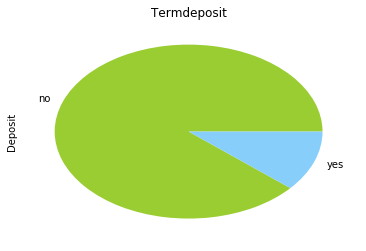

In [230]:
# plot data
colors = ['yellowgreen','lightskyblue']
bankdf['Deposit'].value_counts().plot(kind='pie',title='Termdeposit',colors=colors)
plt.show()


In [11]:
#Histogram

Text(0.5,0,'deposit')

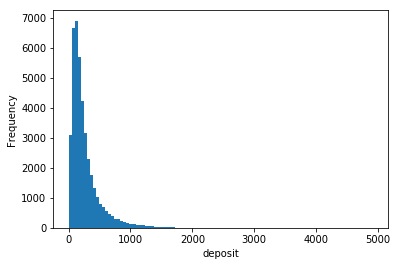

In [232]:
bankdf['duration'].plot(kind='hist',bins=100)
plt.xlabel('deposit')

In [13]:
#Histogram

<Figure size 432x288 with 0 Axes>

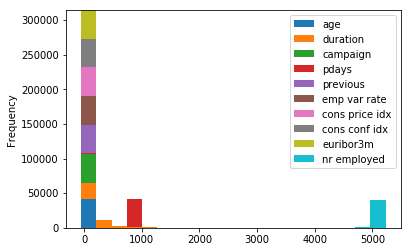

In [233]:
plt.figure();

bankdf.plot.hist(stacked=True, bins=20)

In [15]:
#Horizontal and cumulative histogram

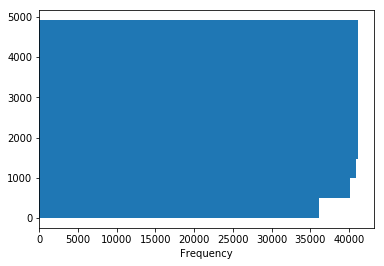

In [234]:

plt.figure();
bankdf['duration'].plot.hist(orientation='horizontal', cumulative=True)

In [17]:
#Boxplot


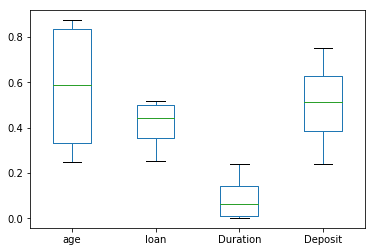

In [235]:
bankdf = pd.DataFrame(np.random.rand(4,4), columns=['age', 'loan', 'Duration', 'Deposit'])

bankdf.plot.box()

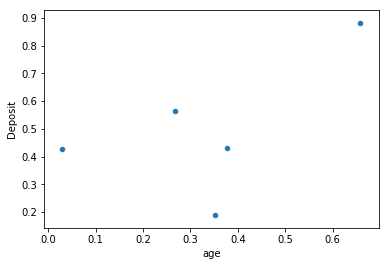

In [236]:

bankdf = pd.DataFrame(np.random.rand(5, 5), columns=['age', 'loan', 'pdays', 'Deposit','duration'])

bankdf.plot.scatter(x='age', y='Deposit');

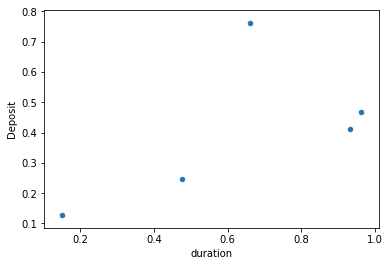

In [237]:

bankdf = pd.DataFrame(np.random.rand(5, 5), columns=['age', 'loan', 'pdays', 'Deposit','duration'])

bankdf.plot.scatter(x='duration', y='Deposit');


In [238]:

print("Total data points:", df.count())
df.show()

Total data points: 41188
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+---+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+-------+
|age|        job| marital|          education|default|housing|loan|  contact|month|day|duration|campaign|pdays|previous|   poutcome|emp var rate|cons price idx|cons conf idx|euribor3m|nr employed|Deposit|
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+---+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+-------+
| 56|  housemaid| married|           basic.4y|     no|     no|  no|telephone|  may|mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0|     no|
| 57|   services| married|        high.school|unknown|     no|  no|telephone|  may|mon|     149|       1|  999|       0|nonexistent|         1.1|        93

In [107]:
bankdf.drop(['job','marital','education','cons conf idx','housing'],axis=1)


,age,default,loan,contact,month,day of week,duration,campaign,pdays,previous,poutcome,emp var rate,cons price idx,euribor3m,nr employed,Deposit
0,56,no,no,telephone,may,mon,261,1.0,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
1,57,unknown,no,telephone,may,mon,149,1.0,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
2,37,no,no,telephone,may,mon,226,1.0,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
3,40,no,no,telephone,may,mon,151,1.0,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
4,56,no,yes,telephone,may,mon,307,1.0,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
5,45,unknown,no,telephone,may,mon,198,1.0,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
6,59,no,no,telephone,may,mon,139,1.0,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
7,41,unknown,no,telephone,may,mon,217,1.0,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
8,24,no,no,telephone,may,mon,380,1.0,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
9,25,no,no,telephone,may,mon,50,1.0,999,0,nonexistent,1.1,93.994,4.857,5191.0,no


In [239]:

pd.DataFrame(df.take(5), columns=df.columns)

,age,job,marital,education,default,housing,loan,contact,month,day,...,campaign,pdays,previous,poutcome,emp var rate,cons price idx,cons conf idx,euribor3m,nr employed,Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


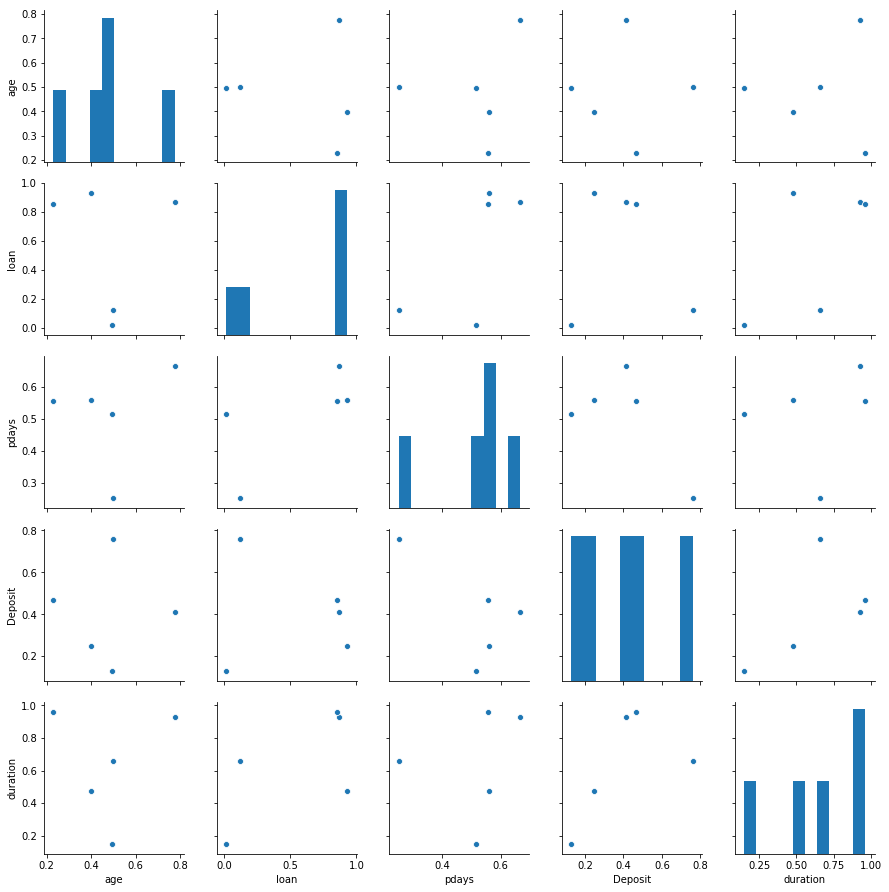

In [241]:
sns.pairplot(bankdf)

In [242]:
ndf=df.drop('job','marital','education','cons conf idx','housing')

In [243]:
ndf.show()

+---+-------+----+---------+-----+---+--------+--------+-----+--------+-----------+------------+--------------+---------+-----------+-------+
|age|default|loan|  contact|month|day|duration|campaign|pdays|previous|   poutcome|emp var rate|cons price idx|euribor3m|nr employed|Deposit|
+---+-------+----+---------+-----+---+--------+--------+-----+--------+-----------+------------+--------------+---------+-----------+-------+
| 56|     no|  no|telephone|  may|mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|    4.857|     5191.0|     no|
| 57|unknown|  no|telephone|  may|mon|     149|       1|  999|       0|nonexistent|         1.1|        93.994|    4.857|     5191.0|     no|
| 37|     no|  no|telephone|  may|mon|     226|       1|  999|       0|nonexistent|         1.1|        93.994|    4.857|     5191.0|     no|
| 40|     no|  no|telephone|  may|mon|     151|       1|  999|       0|nonexistent|         1.1|        93.994|    4.857|     5191.0|     no|
| 56| 

In [244]:
from pyspark.ml.feature import (VectorAssembler, StringIndexer, VectorIndexer, OneHotEncoder)

In [253]:
# First create a string indexer which converts every string into a number, such as male = 0 and female = 1.
# A number will be assigned to every category in the column.
loan_indexer = StringIndexer(inputCol='loan',outputCol='loanIndex')
contact_indexer = StringIndexer(inputCol='contact',outputCol='contactIndex')
month_indexer = StringIndexer(inputCol='month',outputCol='monthIndex')
day_indexer = StringIndexer(inputCol='day',outputCol='dayIndex')
default_indexer = StringIndexer(inputCol='default',outputCol='defaultIndex')
poutcome_indexer = StringIndexer(inputCol='poutcome',outputCol='poutcomeIndex')
Deposit_indexer = StringIndexer(inputCol='Deposit',outputCol='label')

In [254]:
# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when you have multiple classes.
loan_encoder = OneHotEncoder(inputCol='loanIndex',outputCol='loanVec')
contact_encoder = OneHotEncoder(inputCol='contactIndex',outputCol='contactVec')
month_encoder = OneHotEncoder(inputCol='monthIndex',outputCol='monthVec')
day_encoder = OneHotEncoder(inputCol='dayIndex',outputCol='dayVec')
default_encoder = OneHotEncoder(inputCol='defaultIndex',outputCol='defaultVec')
poutcome_encoder = OneHotEncoder(inputCol='poutcomeIndex',outputCol='poutcomeVec')



In [257]:
# And finally, using vector assembler to turn all of these columns into one column (named features).
assembler = VectorAssembler(inputCols=['loanVec','contactVec','monthVec','defaultVec',
                                       'dayVec','poutcomeVec',
                                       'age', 'duration', 'campaign', 'pdays',
                                       'previous','emp var rate','euribor3m','nr employed'], outputCol="Bankmarket")

In [258]:
from pyspark.ml import Pipeline

# Then go through our steps. It's essentially sequential to the above.
pipeline = Pipeline(stages=[loan_indexer, contact_indexer, month_indexer, day_indexer,
                            default_indexer, poutcome_indexer, Deposit_indexer,loan_encoder,
                            contact_encoder, month_encoder ,day_encoder,default_encoder,
                           poutcome_encoder, assembler])

# Now that we've got a number of steps, let's apply it to the DataFrame.
pipeline_model = pipeline.fit(ndf)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(ndf)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'Bankmarket')

In [260]:
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.75,0.25])

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='Bankmarket',labelCol='label')

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
results = lr_model.transform(test_data)

Py4JJavaError: An error occurred while calling o4727.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 356.0 failed 1 times, most recent failure: Lost task 0.0 in stage 356.0 (TID 664, localhost, executor driver): org.apache.spark.SparkException: Failed to execute user defined function($anonfun$3: (struct<loanVec:vector,contactVec:vector,monthVec:vector,defaultVec:vector,dayVec:vector,poutcomeVec:vector,age_double_VectorAssembler_45b0977372e93472ef56:double,duration_double_VectorAssembler_45b0977372e93472ef56:double,campaign_double_VectorAssembler_45b0977372e93472ef56:double,pdays_double_VectorAssembler_45b0977372e93472ef56:double,previous_double_VectorAssembler_45b0977372e93472ef56:double,emp var rate:double,euribor3m:double,nr employed:double>) => vector)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.sort_addToSorter$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$8$$anon$1.hasNext(WholeStageCodegenExec.scala:377)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:215)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1005)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:936)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:700)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:334)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:285)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Values to assemble cannot be null.
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$assemble$1.apply(VectorAssembler.scala:160)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$assemble$1.apply(VectorAssembler.scala:143)
	at scala.collection.IndexedSeqOptimized$class.foreach(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:35)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:143)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$3.apply(VectorAssembler.scala:99)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$3.apply(VectorAssembler.scala:98)
	... 24 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1925)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1988)
	at org.apache.spark.rdd.RDD$$anonfun$reduce$1.apply(RDD.scala:1026)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.reduce(RDD.scala:1008)
	at org.apache.spark.rdd.RDD$$anonfun$treeAggregate$1.apply(RDD.scala:1151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1128)
	at org.apache.spark.ml.classification.LogisticRegression.train(LogisticRegression.scala:352)
	at org.apache.spark.ml.classification.LogisticRegression.train(LogisticRegression.scala:322)
	at org.apache.spark.ml.classification.LogisticRegression.train(LogisticRegression.scala:193)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:96)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:72)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Failed to execute user defined function($anonfun$3: (struct<loanVec:vector,contactVec:vector,monthVec:vector,defaultVec:vector,dayVec:vector,poutcomeVec:vector,age_double_VectorAssembler_45b0977372e93472ef56:double,duration_double_VectorAssembler_45b0977372e93472ef56:double,campaign_double_VectorAssembler_45b0977372e93472ef56:double,pdays_double_VectorAssembler_45b0977372e93472ef56:double,previous_double_VectorAssembler_45b0977372e93472ef56:double,emp var rate:double,euribor3m:double,nr employed:double>) => vector)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.sort_addToSorter$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$8$$anon$1.hasNext(WholeStageCodegenExec.scala:377)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:215)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:1005)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:936)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:996)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:700)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:334)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:285)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:322)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: org.apache.spark.SparkException: Values to assemble cannot be null.
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$assemble$1.apply(VectorAssembler.scala:160)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$assemble$1.apply(VectorAssembler.scala:143)
	at scala.collection.IndexedSeqOptimized$class.foreach(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:35)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:143)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$3.apply(VectorAssembler.scala:99)
	at org.apache.spark.ml.feature.VectorAssembler$$anonfun$3.apply(VectorAssembler.scala:98)
	... 24 more
